# Membaca dataset Loan Disbursement

In [1]:
#Package untuk membantu dalam manipulasi data
library(dplyr)
#Package untuk memformat value data numerik dalam eksplorasi data 
library(scales)
#Package yang digunakan untuk membuat plot
library(ggplot2)
#Membaca dataset .csv disimpan di df_loan
#stringsAsFactors berfungsi untuk data bertipe character tidak diubah menjadi factor
df_loan <- read.csv("../input/loan-disbursement/loan_disbursement.csv", stringsAsFactors = F)
#Menampilkan rangkuman data df_loan
glimpse(df_loan)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 9,754
Columns: 5
$ loan_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ tanggal_cair <chr> "2020-01-06", "2020-01-06", "2020-01-06", "2020-01-06", …
$ cabang       <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AB", "AB", "AB", "A…
$ agen         <chr> "AA-1", "AA-1", "AA-1", "AA-2", "AA-2", "AA-2", "AB-1", …
$ amount       <int> 320000, 440000, 200000, 430000, 360000, 220000, 320000, …


# Memfilter Jumlah Data per Cabang di Bulan Mei 2020

In [2]:
df_loan_mei <- df_loan %>% 
    #Memfilter data untuk bulan Mei 2020
    filter(tanggal_cair >='2020-05-01', tanggal_cair <= '2020-05-31') %>% 
    #group berdasarkan cabang
    group_by(cabang) %>% 
    #Fungsi summarise menghitung total amount masing - masing cabang
    summarise(total_amount = sum(amount)) 

df_loan_mei

`summarise()` ungrouping output (override with `.groups` argument)



cabang,total_amount
<chr>,<int>
AA,75710000
AB,81440000
AC,83990000
AD,76080000
AE,54200000
AF,68040000
AG,74080000
AH,73840000
AI,46640000


# Menampilkan Data 5 Cabang dengan Total Amount Paling Besar

In [3]:
#Mengurutkan data total amount dari yang terbesar (Desc) dengan fungsi arrange
df_loan_mei %>% arrange(desc(total_amount)) %>% 
    #menampilkan total amount dalam format comma
    mutate(total_amount = comma(total_amount)) %>% 
    #menampilkan 5 data teratas
    head(5)

cabang,total_amount
<chr>,<chr>
AC,"83,990,000"
AB,"81,440,000"
AD,"76,080,000"
AA,"75,710,000"
AG,"74,080,000"


# Menampilkan Data 5 Cabang dengan Total Amount Paling Kecil

In [4]:
#Mengurutkan data total amount dari yang terkecil dengan fungsi arrange
df_loan_mei %>% arrange(total_amount) %>% 
    #menampilkan total amount dalam format comma
    mutate(total_amount = comma(total_amount)) %>% 
    #menampilkan 5 data teratas
    head(5)

cabang,total_amount
<chr>,<chr>
AV,"30,280,000"
AS,"31,740,000"
AT,"34,840,000"
AU,"35,610,000"
AO,"39,120,000"


# Menghitung Umur Cabang (Dalam Bulan)

In [5]:
df_cabang_umur <- df_loan %>% group_by(cabang) %>% 
    #menghitung tanggal pertama cair dari cabang dengan fungsi min()
    summarise(pertama_cair= min(tanggal_cair)) %>% 
    #membuat variabel umur dengan menghitung umur dari pertama cair sampai tanggal 15 mei 2020
    mutate(umur = as.numeric(as.Date('2020-05-15') - as.Date(pertama_cair)) %/% 30)
#print df_cabang_umur
print(df_cabang_umur)

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 22 x 3
   cabang pertama_cair  umur
   <chr>  <chr>        <dbl>
 1 AA     2020-01-06       4
 2 AB     2020-01-06       4
 3 AC     2020-01-06       4
 4 AD     2020-01-06       4
 5 AE     2020-02-03       3
 6 AF     2020-02-03       3
 7 AG     2020-02-03       3
 8 AH     2020-02-03       3
 9 AI     2020-03-02       2
10 AJ     2020-03-02       2
# … with 12 more rows


# Menggabungkan Data Umur dan Performa Cabang untuk Bulan Mei

In [6]:
df_loan_mei_umur <- df_cabang_umur %>% 
    #join tabel dengan inner join
    inner_join(df_loan_mei, by='cabang')
#menampilakn data df_loan_mei_umur
df_loan_mei_umur

cabang,pertama_cair,umur,total_amount
<chr>,<chr>,<dbl>,<int>
AA,2020-01-06,4,75710000
AB,2020-01-06,4,81440000
AC,2020-01-06,4,83990000
AD,2020-01-06,4,76080000
AE,2020-02-03,3,54200000
AF,2020-02-03,3,68040000
AG,2020-02-03,3,74080000
AH,2020-02-03,3,73840000
AI,2020-03-02,2,46640000


# Plot Relasi Umur dan Performa Mei

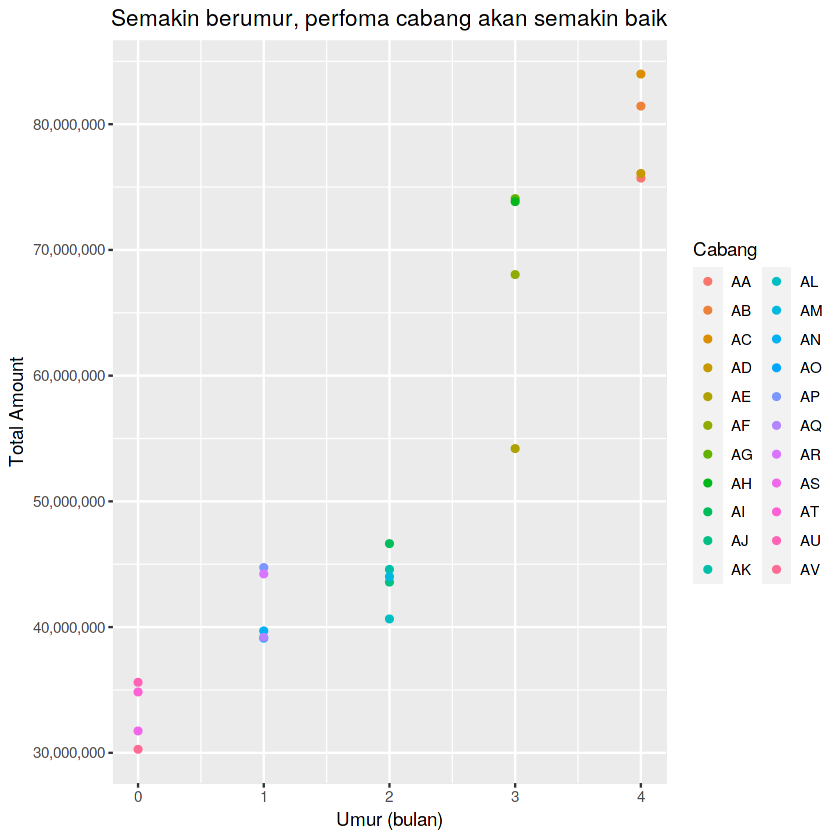

In [7]:
#Membuat plot data df_loan_mei_umur, dengan sumbu x untuk umur dan y untuk total amount
ggplot(df_loan_mei_umur, aes(x = umur, y = total_amount, color=cabang)) +
  #Untuk menggambar grafik berupa titik yang menunjukkan hubungan antar variable atau scatter plot
  geom_point() +
  #membuat sumbu y bernilai comma
  scale_y_continuous(labels = scales::comma) +
  #Menempatkan judul di tengah plot
  theme(plot.title = element_text(hjust=0.5)) +
  #Merubah label plot
  labs(title = "Semakin berumur, perfoma cabang akan semakin baik",
       x = "Umur (bulan)",
       y = "Total Amount",
       color="Cabang")

# Mencari Cabang yang Perfoma Rendah

In [8]:
df_loan_mei_flag <- df_loan_mei_umur %>% group_by(umur) %>% 
  #Membuat variabel baru dan menghitung nilai Quartile dan Inter Quartile Range 
  mutate(Q1=quantile(total_amount,0.25), Q3=quantile(total_amount,0.75), IQR=(Q3-Q1)) %>% 
  #Membuat variabel flag dan menentukan nilai performanya jika kurang dari (Q1 - IQR) makan 'rendah' dan 'baik' untuk selain itu
  mutate(flag=ifelse(total_amount<(Q1-IQR),'rendah', 'baik'))
#Memfilter nilai peforma cabang yang rendah
df_loan_mei_flag %>% filter(flag == 'rendah') %>% 
  #Mengubah kolom numeric menjadi comma dengan fungsi mutate_if
  mutate_if(is.numeric, funs(comma))

`mutate_if()` ignored the following grouping variables:
Column `umur`

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


cabang,pertama_cair,umur,total_amount,Q1,Q3,IQR,flag
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,2020-02-03,3,"54,200,000","64,580,000","73,900,000","9,320,000",rendah
AL,2020-03-02,2,"40,650,000","43,580,000","44,590,000","1,010,000",rendah


# Scatterplot untuk Cabang yang Rendah Peformanya

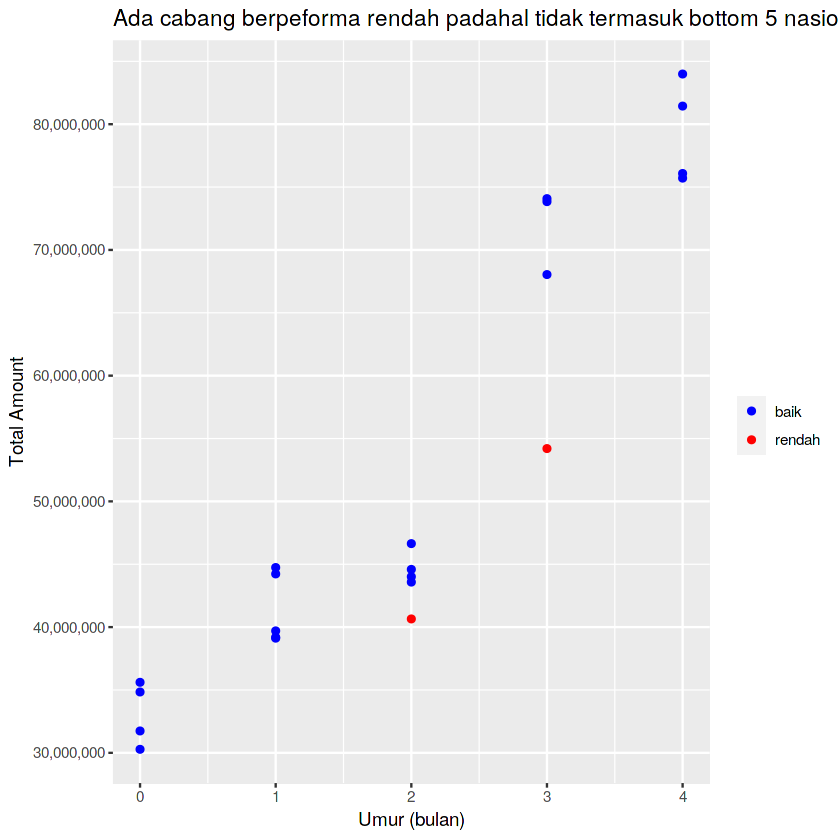

In [9]:
#Membuat plot untuk melihat performa cabang
ggplot(df_loan_mei_flag, aes(x = umur, y = total_amount)) +
  geom_point(aes(color = flag)) +
  scale_color_manual(breaks = c("baik", "rendah"),
                        values=c("blue", "red")) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Ada cabang berpeforma rendah padahal tidak termasuk bottom 5 nasional",
       color = "",
       x = "Umur (bulan)",
       y = "Total Amount")

# Melihat perbadingan performa cabang di umur yang sama

In [10]:
df_loan_mei_flag %>% 
  #Memfilter umur 3 bulan
  filter(umur == 3) %>% 
  #inner join dengan data df_loan
  inner_join(df_loan, by = 'cabang') %>% 
  #memfilter tanggal untuk bulan mei
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  #Group by cabang dan flag
  group_by(cabang, flag) %>% 
  #menghitung jumlah data yang berbeda dengan fungsu n_distinct, menghitung sum dan mean pada amount
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            agen_aktif = n_distinct(agen),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  #mengurutkan data total_amount
  arrange(total_amount) %>% 
  #Mengubah kolom numeric menjadi comma dengan fungsi mutate_if
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,flag,jumlah_hari,agen_aktif,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,rendah,21,3,175,"309,714","54,200,000"
AF,baik,21,3,225,"302,400","68,040,000"
AH,baik,21,3,241,"306,390","73,840,000"
AG,baik,21,3,241,"307,386","74,080,000"


# Melihat Perbadingan Performa Agen pada Cabang yang Rendah

In [11]:
df_loan_mei_flag %>% 
  #Memfilter umur 3 bulan dan flag rendah
  filter(umur == 3, flag == 'rendah') %>%
  #inner join dengan data df_loan
  inner_join(df_loan, by = 'cabang') %>% 
  #memfilter tanggal untuk bulan mei
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  #Group by cabang dan agen
  group_by(cabang, agen) %>% 
  #menghitung jumlah data yang berbeda dengan fungsi n_distinct, menghitung sum dan mean pada amount
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  #mengurutkan data total_amount
  arrange(total_amount) %>% 
  #Mengubah kolom numeric menjadi comma dengan fungsi mutate_if
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,AE-3,4.0,16,"310,625","4,970,000"
AE,AE-2,18.0,73,"320,274","23,380,000"
AE,AE-1,21.0,86,"300,581","25,850,000"


# Melihat Perbadingan Performa Agen pada Cabang yang Paling Baik

In [12]:
df_loan %>% 
  #Memfilter untuk menampilkan dabang 'AH'
  filter(cabang == 'AH') %>% 
  #memfilter tanggal untuk bulan mei
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  #Group by cabang dan agen
  group_by(cabang, agen) %>% 
  #menghitung jumlah data yang berbeda dengan fungsi n_distinct, menghitung sum dan mean pada amount
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  #mengurutkan data total_amount
  arrange(total_amount) %>% 
  #Mengubah kolom numeric menjadi comma dengan fungsi mutate_if
  mutate_if(is.numeric, funs(comma))

`summarise()` regrouping output by 'cabang' (override with `.groups` argument)

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AH,AH-3,19.0,74.0,"303,649","22,470,000"
AH,AH-1,21.0,81.0,"301,358","24,410,000"
AH,AH-2,21.0,86.0,"313,488","26,960,000"
